In [288]:
### Polynomial Regression for County Chickenpox Data in Hungary

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [290]:
# Load the dataset
df = pd.read_csv("hungary_chickenpox.csv")
spatial_data = pd.read_csv('hungary_county_edges.csv')

In [291]:
df.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [292]:
spatial_data.head()

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13


In [293]:
# df = pd.merge(temporal_data, spatial_data)

In [294]:
df.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [295]:
len(df)

522

In [296]:
df.iloc(axis=1)[0]

0      03/01/2005
1      10/01/2005
2      17/01/2005
3      24/01/2005
4      31/01/2005
          ...    
517    01/12/2014
518    08/12/2014
519    15/12/2014
520    22/12/2014
521    29/12/2014
Name: Date, Length: 522, dtype: object

In [297]:
# df.insert(loc=0, column="Week", [i for i in range(1, len(df) + 1)])

df.insert(0, "Week", [i for i in range(1, len(df) + 1)])

df

,Week,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,1,03/01/2005,168,79,30,173,169,42,136,120,...,130,57,2,178,66,64,11,29,87,68
1,2,10/01/2005,157,60,30,92,200,53,51,70,...,80,50,29,141,48,29,58,53,68,26
2,3,17/01/2005,96,44,31,86,93,30,93,84,...,64,46,4,157,33,33,24,18,62,44
3,4,24/01/2005,163,49,43,126,46,39,52,114,...,63,54,14,107,66,50,25,21,43,31
4,5,31/01/2005,122,78,53,87,103,34,95,131,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,01/12/2014,95,12,41,6,39,0,16,15,...,56,7,13,122,4,23,4,11,110,10
518,519,08/12/2014,43,39,31,10,34,3,2,30,...,34,20,18,70,36,5,23,22,63,9
519,520,15/12/2014,35,7,15,0,0,0,7,7,...,30,36,4,72,5,21,14,0,17,10
520,521,22/12/2014,30,23,8,0,11,4,1,9,...,27,17,21,12,5,17,1,1,83,2


In [298]:
# df = df.set_index("Week")

# df = df.reset_index()

In [299]:
df

,Week,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,1,03/01/2005,168,79,30,173,169,42,136,120,...,130,57,2,178,66,64,11,29,87,68
1,2,10/01/2005,157,60,30,92,200,53,51,70,...,80,50,29,141,48,29,58,53,68,26
2,3,17/01/2005,96,44,31,86,93,30,93,84,...,64,46,4,157,33,33,24,18,62,44
3,4,24/01/2005,163,49,43,126,46,39,52,114,...,63,54,14,107,66,50,25,21,43,31
4,5,31/01/2005,122,78,53,87,103,34,95,131,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,01/12/2014,95,12,41,6,39,0,16,15,...,56,7,13,122,4,23,4,11,110,10
518,519,08/12/2014,43,39,31,10,34,3,2,30,...,34,20,18,70,36,5,23,22,63,9
519,520,15/12/2014,35,7,15,0,0,0,7,7,...,30,36,4,72,5,21,14,0,17,10
520,521,22/12/2014,30,23,8,0,11,4,1,9,...,27,17,21,12,5,17,1,1,83,2


In [300]:
df['Week']

0        1
1        2
2        3
3        4
4        5
      ... 
517    518
518    519
519    520
520    521
521    522
Name: Week, Length: 522, dtype: int64

In [301]:
# df.iloc[0]

In [302]:
# column_list = df.columns.get_values()
# column_list.columns.tolist()

column_list = df.columns.to_list()

column_list

['Week',
 'Date',
 'BUDAPEST',
 'BARANYA',
 'BACS',
 'BEKES',
 'BORSOD',
 'CSONGRAD',
 'FEJER',
 'GYOR',
 'HAJDU',
 'HEVES',
 'JASZ',
 'KOMAROM',
 'NOGRAD',
 'PEST',
 'SOMOGY',
 'SZABOLCS',
 'TOLNA',
 'VAS',
 'VESZPREM',
 'ZALA']

In [303]:
column_list.remove('Week')
column_list.remove('Date')

column_list

['BUDAPEST',
 'BARANYA',
 'BACS',
 'BEKES',
 'BORSOD',
 'CSONGRAD',
 'FEJER',
 'GYOR',
 'HAJDU',
 'HEVES',
 'JASZ',
 'KOMAROM',
 'NOGRAD',
 'PEST',
 'SOMOGY',
 'SZABOLCS',
 'TOLNA',
 'VAS',
 'VESZPREM',
 'ZALA']

In [304]:
type(column_list)

list

In [305]:
# Study the spatiotemporal patterns of chickenpox cases in Hungary
# plt.plot(df["Week"], df["BUDAPEST"])
# plt.xlabel("Week")
# plt.ylabel("Number of cases in Budapest")
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

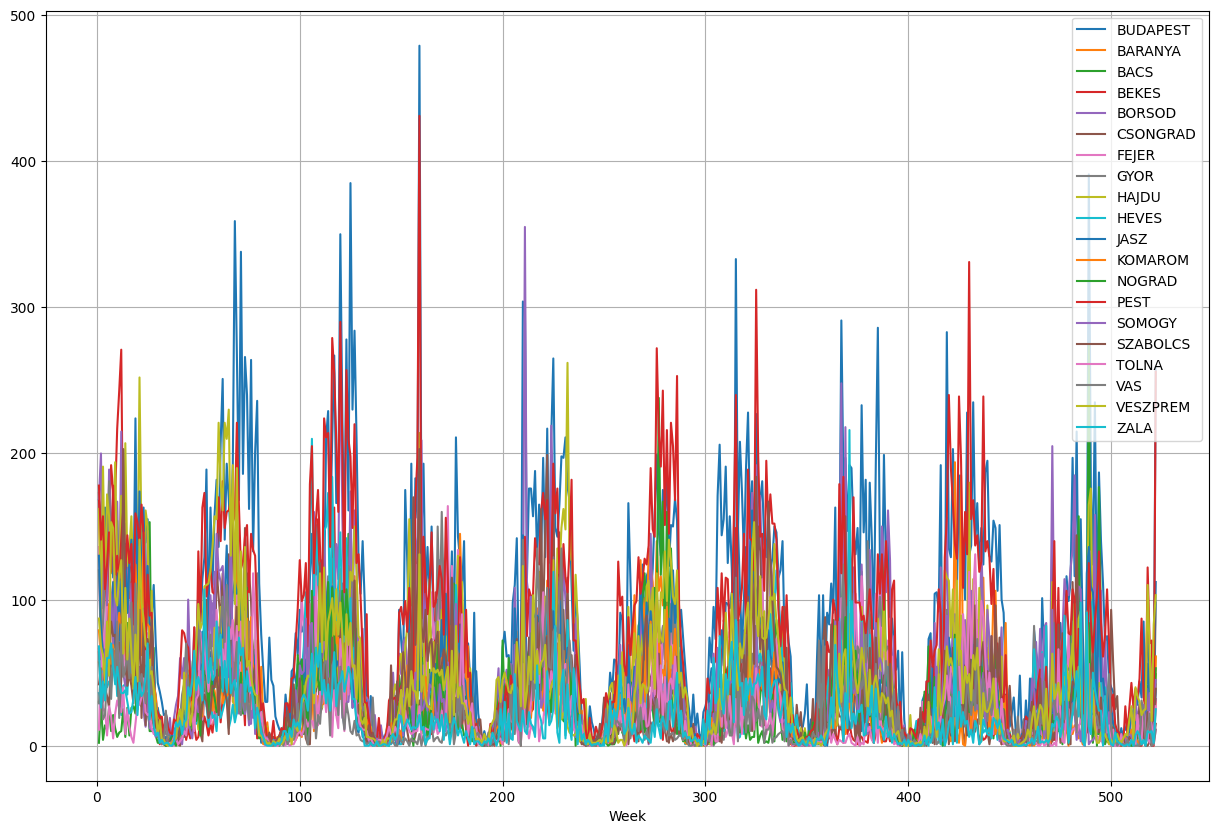

In [306]:
df.plot(x = 'Week',  figsize=(15, 10), grid=True)
plt.show

In [307]:
len(column_list)

20

In [308]:
df[column_list].mean()

BUDAPEST    101.245211
BARANYA      34.204981
BACS         37.166667
BEKES        28.911877
BORSOD       57.082375
CSONGRAD     31.488506
FEJER        33.272031
GYOR         41.436782
HAJDU        47.097701
HEVES        29.691571
JASZ         40.869732
KOMAROM      25.643678
NOGRAD       21.850575
PEST         86.101533
SOMOGY       27.609195
SZABOLCS     29.854406
TOLNA        20.352490
VAS          22.467433
VESZPREM     40.636015
ZALA         19.873563
dtype: float64

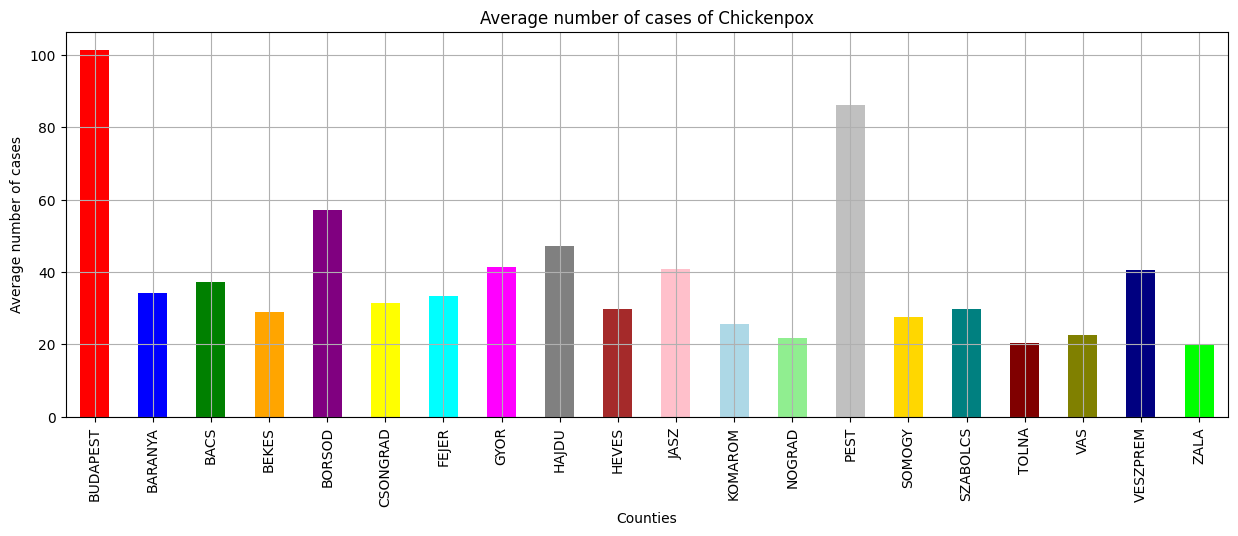

In [309]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown','pink', 'lightblue', 'lightgreen', 
          'silver', 'gold', 'teal', 'maroon', 'olive', 'navy', 'lime']
 
df[column_list].mean().plot(kind='bar', color=colors, figsize=(15, 5), grid=True)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.xlabel('Counties')
plt.ylabel('Average number of cases')
plt.title('Average number of cases of Chickenpox')

# plt.tight_layout() 

plt.show()

In [310]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [311]:
# df[['Week']].values

In [312]:
# # Extract the 'Week' and 'BUDAPEST' columns as features and target variable, respectively
# x = df['Week'].values.reshape(-1, 1)
# y = df['BUDAPEST'].values

In [313]:
# # Normalize the dataset
# scaler = MinMaxScaler()
# x_scaled = scaler.fit_transform(x)
# y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

In [314]:
# # Split the dataset into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

In [315]:
# # Perform polynomial regression for degrees 1 to 10
# degrees = range(1, 11)
# mse_train = []
# mse_test = []
# plt.figure(figsize=(10, 6))

# best_degree = 1
# best_mse_test = float('inf')

In [316]:
# for degree in degrees:
#     # Create polynomial features
#     poly_features = PolynomialFeatures(degree=degree)
#     x_train_poly = poly_features.fit_transform(x_train)
#     x_test_poly = poly_features.transform(x_test)

#     # Fit polynomial regression model
#     model = LinearRegression()
#     model.fit(x_train_poly, y_train)

#     # Predict y values for train and test sets
#     y_train_pred = model.predict(x_train_poly)
#     y_test_pred = model.predict(x_test_poly)

#     # Calculate mean squared error
#     mse_train.append(np.mean((y_train_pred - y_train) ** 2))
#     mse_test.append(np.mean((y_test_pred - y_test) ** 2))


In [317]:
# mse_test

In [318]:
# plt.plot(degrees, mse_train, label='MSE Train')
# plt.plot(degrees, mse_test, label='MSE Test')
# plt.xlabel('Degree')
# plt.ylabel('Mean Squared Error')
# plt.title('MSE Train and MSE Test vs Degree')
# plt.legend()
# plt.grid(True)
# plt.show()

In [319]:
# best_degree = np.argmin(mse_test) + 1

# best_degree

In [320]:
x = df['Week'].values.reshape(-1, 1)
y_df = df[column_list]

y_df

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,168,79,30,173,169,42,136,120,162,36,130,57,2,178,66,64,11,29,87,68
1,157,60,30,92,200,53,51,70,84,28,80,50,29,141,48,29,58,53,68,26
2,96,44,31,86,93,30,93,84,191,51,64,46,4,157,33,33,24,18,62,44
3,163,49,43,126,46,39,52,114,107,42,63,54,14,107,66,50,25,21,43,31
4,122,78,53,87,103,34,95,131,172,40,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,95,12,41,6,39,0,16,15,14,10,56,7,13,122,4,23,4,11,110,10
518,43,39,31,10,34,3,2,30,25,19,34,20,18,70,36,5,23,22,63,9
519,35,7,15,0,0,0,7,7,4,2,30,36,4,72,5,21,14,0,17,10
520,30,23,8,0,11,4,1,9,10,17,27,17,21,12,5,17,1,1,83,2


In [321]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
# y_scaled = scaler.fit_transform(y_df.reshape(-1, 1)).flatten()

In [322]:
x_scaled

array([[0.        ],
       [0.00191939],
       [0.00383877],
       [0.00575816],
       [0.00767754],
       [0.00959693],
       [0.01151631],
       [0.0134357 ],
       [0.01535509],
       [0.01727447],
       [0.01919386],
       [0.02111324],
       [0.02303263],
       [0.02495202],
       [0.0268714 ],
       [0.02879079],
       [0.03071017],
       [0.03262956],
       [0.03454894],
       [0.03646833],
       [0.03838772],
       [0.0403071 ],
       [0.04222649],
       [0.04414587],
       [0.04606526],
       [0.04798464],
       [0.04990403],
       [0.05182342],
       [0.0537428 ],
       [0.05566219],
       [0.05758157],
       [0.05950096],
       [0.06142035],
       [0.06333973],
       [0.06525912],
       [0.0671785 ],
       [0.06909789],
       [0.07101727],
       [0.07293666],
       [0.07485605],
       [0.07677543],
       [0.07869482],
       [0.0806142 ],
       [0.08253359],
       [0.08445298],
       [0.08637236],
       [0.08829175],
       [0.090

In [323]:
# Split the dataset into train and test sets
x_train, x_test = train_test_split(x_scaled, test_size=0.2, random_state=42)

In [324]:
# y_df_train.head()

In [325]:
# Perform polynomial regression for degrees 1 to 10
degrees = range(1, 11)
mse_train = []
mse_test = []

for degree in degrees:
    mse_train_degree = []
    mse_test_degree = []
    
    for column in column_list:
        # Extract the target variable for the current county
        y = y_df[column].values

        # Normalize the target variable
        y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

        # Split the target variable into train and test sets
        y_train, y_test = train_test_split(y_scaled, test_size=0.2, random_state=42)

        # Create polynomial features
        poly_features = PolynomialFeatures(degree=degree)
        x_train_poly = poly_features.fit_transform(x_train)
        x_test_poly = poly_features.transform(x_test)

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(x_train_poly, y_train)

        # Predict y values for train and test sets
        y_train_pred = model.predict(x_train_poly)
        y_test_pred = model.predict(x_test_poly)

        # Calculate mean squared error
        mse_train_degree.append(np.mean((y_train_pred - y_train) ** 2))
        mse_test_degree.append(np.mean((y_test_pred - y_test) ** 2))

    # Calculate the mean MSE for the degree across all counties
    mse_train.append(np.mean(mse_train_degree))
    mse_test.append(np.mean(mse_test_degree))

In [326]:
mse_test

[0.031501200465676636,
 0.031267941215610676,
 0.030529929058944055,
 0.030027688420089692,
 0.029200851677614735,
 0.02857141581272337,
 0.02943064683989277,
 0.028801410813903174,
 0.029243740066643698,
 0.02974659483451838]

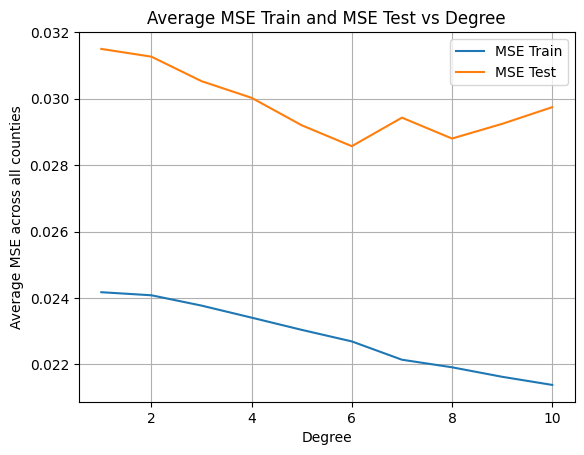

In [327]:
plt.plot(degrees, mse_train, label='MSE Train')
plt.plot(degrees, mse_test, label='MSE Test')
plt.xlabel('Degree')
plt.ylabel('Average MSE across all counties')
plt.title('Average MSE Train and MSE Test vs Degree')
plt.legend()
plt.grid(True)
plt.show()

In [328]:
best_degree = np.argmin(mse_test) + 1

print(f"Hence the best degree of polynomial for our regression model is {best_degree}")

Hence the best degree of polynomial for our regression model is 6


In [329]:
predictions_df_regr = pd.DataFrame({'Week': np.arange(x.max() + 1, x.max() + 13)})

predictions_df_regr

,Week
0,523
1,524
2,525
3,526
4,527
5,528
6,529
7,530
8,531
9,532


In [330]:
for column in column_list:
    # Extract the target variable for the current county
    y = df[column].values

    # Normalize the target variable
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=best_degree)
    x_poly = poly_features.fit_transform(x_scaled)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(x_poly, y_scaled)

    # Predict the next 12 weeks
    future_weeks = np.arange(x_scaled.max() + 1, x_scaled.max() + 13)
    future_x = scaler.transform(future_weeks.reshape(-1, 1))
    future_x_poly = poly_features.transform(future_x)
    future_y_scaled = model.predict(future_x_poly)

    # Denormalize the predicted values
    future_y = scaler.inverse_transform(future_y_scaled.reshape(-1, 1)).flatten()

    # Add predictions to the dataframe
    predictions_df_regr[column] = future_y

In [331]:
predictions_df_regr

,Week,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,523,116.295369,62.291996,65.276441,146.375574,133.895991,32.135554,82.049348,120.684045,153.015138,...,93.511941,68.213204,15.751289,124.905865,52.605796,60.621261,17.041503,46.137833,70.495054,34.213966
1,524,115.669605,59.333329,64.728909,136.633033,128.683815,34.425111,74.101597,110.479664,143.728444,...,91.542900,64.656106,16.068276,123.088501,50.015013,56.809074,20.408489,46.640894,71.519483,35.137134
2,525,115.078106,56.581516,64.156235,127.440580,123.692572,36.453204,66.984401,101.156786,134.936141,...,89.560343,61.328071,16.641841,121.348622,47.685295,53.327552,23.269360,46.829089,72.406028,35.937108
3,526,114.519838,54.027671,63.560619,118.777441,118.916125,38.236427,60.641059,92.664644,126.621075,...,87.569253,58.218288,17.427022,119.684007,45.597353,50.158485,25.669715,46.737173,73.160871,36.620365
4,527,113.993782,51.663138,62.944183,110.623354,114.348448,39.790723,55.017384,84.954389,118.766477,...,85.574373,55.316315,18.382477,118.092479,43.732827,47.284297,27.652488,46.397811,73.790044,37.193183
5,528,113.498939,49.479485,62.308982,102.958566,109.983626,41.131395,50.061636,77.979045,111.355962,...,83.580216,52.612075,19.470333,116.571897,42.074259,44.688042,29.258045,45.841648,74.299432,37.661649
6,529,113.034329,47.468502,61.656994,95.763823,105.815850,42.273125,45.724458,71.693468,104.373521,...,81.591068,50.095844,20.656030,115.120163,40.605065,42.353382,30.524276,45.097377,74.694774,38.031659
7,530,112.598987,45.622197,60.990132,89.020365,101.839419,43.229985,41.958808,66.054299,97.803518,...,79.610991,47.758245,21.908172,113.735217,39.309510,40.264582,31.486685,44.191814,74.981667,38.308920
8,531,112.191967,43.932796,60.310238,82.709914,98.048738,44.015455,38.719900,61.019926,91.630683,...,77.643834,45.590238,23.198379,112.415036,38.172684,38.406492,32.178482,43.149958,75.165565,38.498959
9,532,111.812338,42.392735,59.619087,76.814669,94.438317,44.642435,35.965131,56.550442,85.840109,...,75.693233,43.583112,24.501147,111.157638,37.180476,36.764534,32.630666,41.995065,75.251780,38.607120


In [332]:
predictions_df_regr = predictions_df_regr.round().astype(int)

print("Predictions for next 12 weeks can be seen as follows:")
predictions_df_regr

Predictions for next 12 weeks can be seen as follows:


,Week,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,523,116,62,65,146,134,32,82,121,153,...,94,68,16,125,53,61,17,46,70,34
1,524,116,59,65,137,129,34,74,110,144,...,92,65,16,123,50,57,20,47,72,35
2,525,115,57,64,127,124,36,67,101,135,...,90,61,17,121,48,53,23,47,72,36
3,526,115,54,64,119,119,38,61,93,127,...,88,58,17,120,46,50,26,47,73,37
4,527,114,52,63,111,114,40,55,85,119,...,86,55,18,118,44,47,28,46,74,37
5,528,113,49,62,103,110,41,50,78,111,...,84,53,19,117,42,45,29,46,74,38
6,529,113,47,62,96,106,42,46,72,104,...,82,50,21,115,41,42,31,45,75,38
7,530,113,46,61,89,102,43,42,66,98,...,80,48,22,114,39,40,31,44,75,38
8,531,112,44,60,83,98,44,39,61,92,...,78,46,23,112,38,38,32,43,75,38
9,532,112,42,60,77,94,45,36,57,86,...,76,44,25,111,37,37,33,42,75,39


In [333]:
# predictions_df.plot(x = 'Week',  figsize=(15, 10), grid=True)
# plt.show

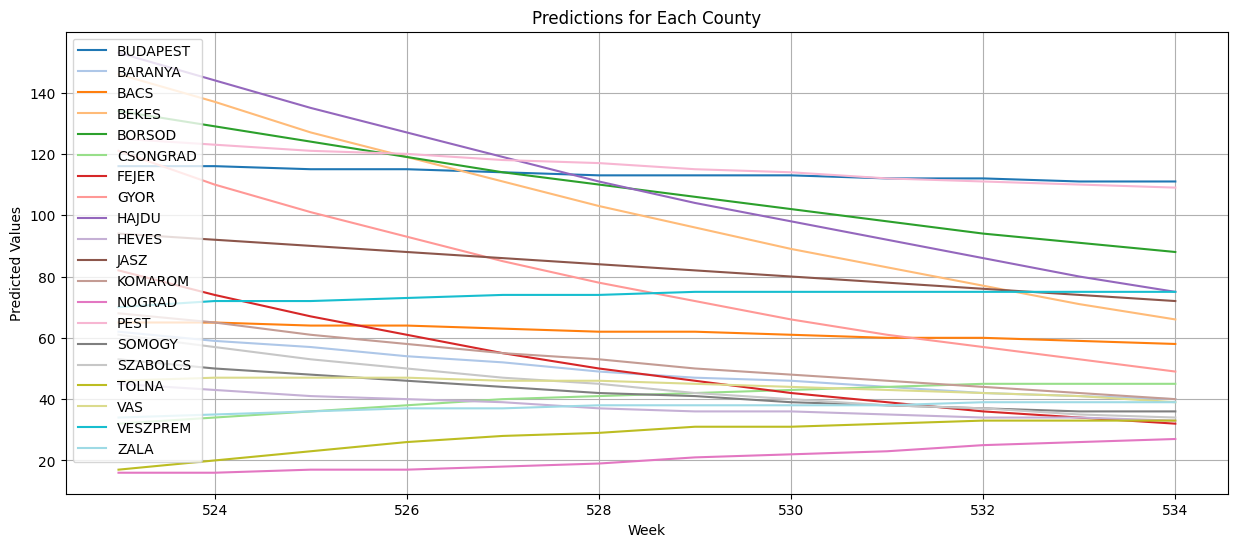

In [334]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Generate 20 different colors

# Set the figsize
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the predictions for each county with different colors
for i, col in enumerate(predictions_df_regr.columns[1:]):
    plt.plot(predictions_df_regr['Week'], predictions_df_regr[col], label=col, color=colors[i])

plt.xlabel('Week')
plt.ylabel('Predicted Values')
plt.title('Predictions for Each County')
plt.legend()
plt.grid(True)
plt.show()


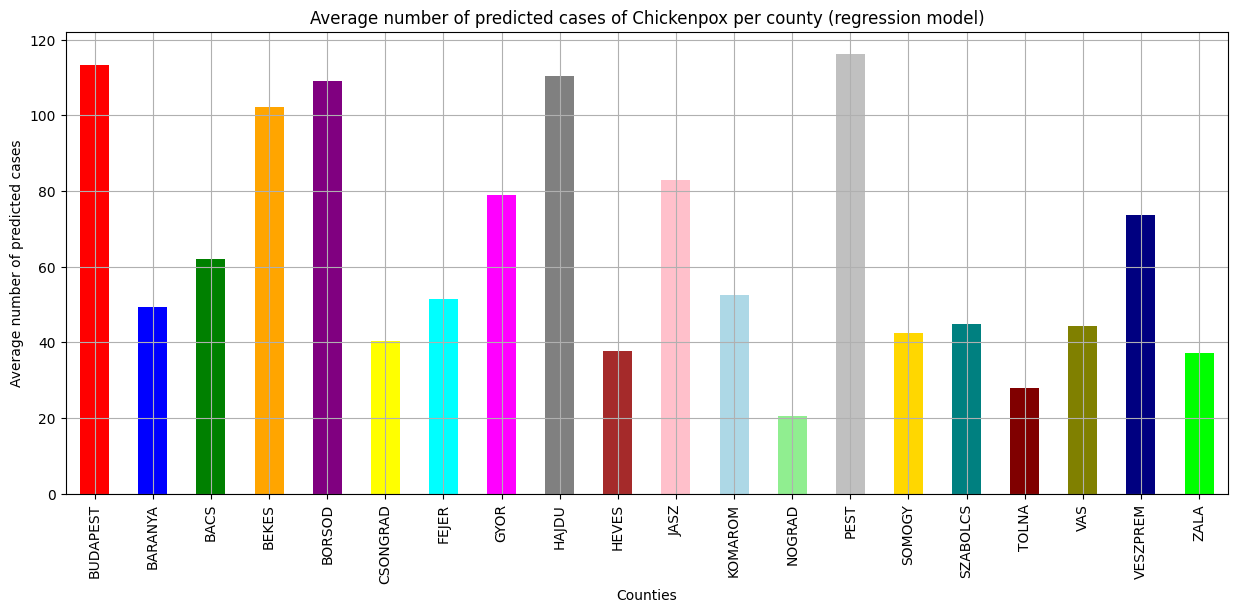

In [335]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown','pink', 'lightblue', 'lightgreen', 
          'silver', 'gold', 'teal', 'maroon', 'olive', 'navy', 'lime']
 
predictions_df_regr[column_list].mean().plot(kind='bar', color=colors, figsize=(15, 6), grid=True)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.xlabel('Counties')
plt.ylabel('Average number of predicted cases')
plt.title('Average number of predicted cases of Chickenpox per county (regression model)')

# plt.tight_layout() 

plt.show()

In [336]:
# colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown','pink', 'lightblue', 'lightgreen', 
#           'silver', 'gold', 'teal', 'maroon', 'olive', 'navy', 'lime']
 
# df[column_list].mean().plot(kind='bar', color=colors, figsize=(15, 6), grid=True)

# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# plt.xlabel('Counties')
# plt.ylabel('Average number of cases')
# plt.title('Average number of cases of Chickenpox')

# # plt.tight_layout() 

# plt.show()

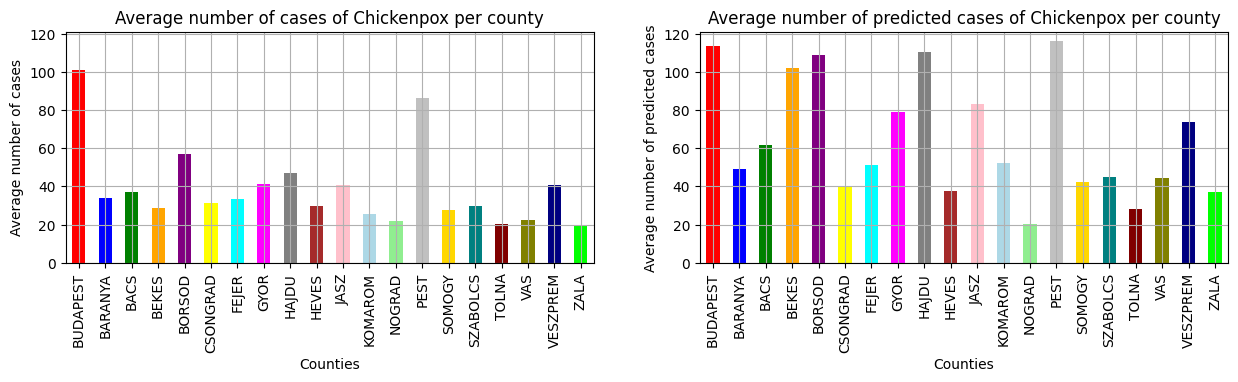

In [337]:
# Define the colors for the plots
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'lightblue', 'lightgreen', 'silver', 'gold', 'teal', 'maroon', 'olive', 'navy', 'lime']

# Create subplots with a 1x2 grid layout
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

avg_cases = df[column_list].mean()

avg_predicted_cases = predictions_df_regr[column_list].mean()

if avg_cases.max() > avg_predicted_cases.max():
    max_cases = avg_cases.max()
else:
    max_cases = avg_predicted_cases.max()

# Plot the average number of cases
avg_cases.plot(kind='bar', color=colors, ax=axes[0], grid=True)
axes[0].set_xticklabels(avg_cases.index, rotation=90)
axes[0].set_xlabel('Counties')
axes[0].set_ylabel('Average number of cases')
axes[0].set_title('Average number of cases of Chickenpox per county')
axes[0].set_ylim([0, np.round(max_cases + 5)])  # Set y-axis limits

# Plot the average number of predicted cases
avg_predicted_cases.plot(kind='bar', color=colors, ax=axes[1], grid=True)
axes[1].set_xticklabels(avg_predicted_cases.index, rotation=90)
axes[1].set_xlabel('Counties')
axes[1].set_ylabel('Average number of predicted cases')
axes[1].set_title('Average number of predicted cases of Chickenpox per county')
axes[1].set_ylim([0, np.round(max_cases + 5)])  # Set y-axis limits

# Adjust the spacing between subplots
#plt.tight_layout()

# Display the plots
plt.show()


In [338]:
from keras.models import Sequential
from keras.layers import Dense

In [339]:
predictions_df_nn = pd.DataFrame({'Week': np.arange(x.max() + 1, x.max() + 13)})

In [340]:
loss_values = []
batch_sizes = []

for size in range(1, 65):

    loss = []

    for column in column_list:
        # Extract the target variable for the current county
        y = y_df[column].values

        # Split the target variable into train and test sets
        y_train, y_test = train_test_split(y_scaled, test_size=0.2, random_state=42)

        # Normalize the target variable
        y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

        model = Sequential([Dense(20, input_dim=1, activation='relu'), 
                            Dense(40, activation='relu'), 
                            Dense(35, activation='relu'),
                            Dense(30, activation='relu'),
                            Dense(25, activation='relu'),
                            Dense(len(column_list), activation='relu')])
        
        # Compile the model
        model.compile(loss='mean_squared_error', optimizer='adam')
        
        history = model.fit(x_train, y_train, epochs=20, batch_size=size, verbose=1)

        loss.append(history.history['loss'])

        print("___________________________________________________________")

        # # Predict the next 12 weeks
        # future_weeks = np.arange(x_scaled.max() + 1, x_scaled.max() + 13)
        # future_x = scaler.transform(future_weeks.reshape(-1, 1))
        # future_y = model.predict(future_x)

        # # Denormalize the predicted values
        # future_y = scaler.inverse_transform(future_y_scaled.reshape(-1, 1)).flatten()

        # # Add predictions to the dataframe
        # predictions_df_nn[column] = future_y

    loss_values.append(np.mean(loss))
    batch_sizes.append(size)
    print("______________________________________________________________")

Epoch 1/20
417/417 [==============================] - 2s 2ms/step - loss: 0.0124
Epoch 2/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 3/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0111
Epoch 4/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 5/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0107
Epoch 6/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0104
Epoch 7/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0103
Epoch 8/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 9/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 10/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 11/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 12/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 13/20
417/417 [====

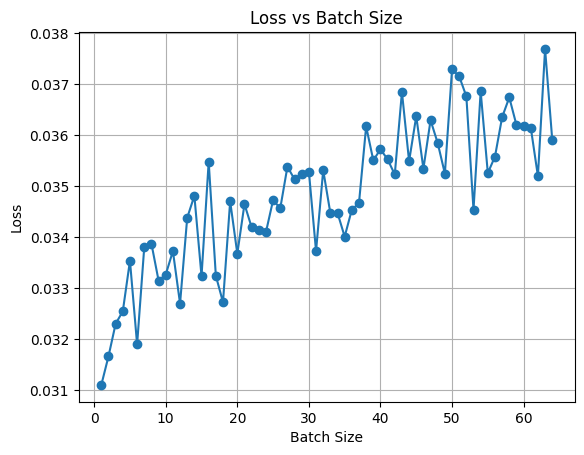

In [341]:
plt.plot(batch_sizes, loss_values, marker='o')

plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.title('Loss vs Batch Size')
plt.grid(True)
plt.show()

In [344]:
best_size = batch_sizes[np.argmin(loss_values)]

best_size

1

In [345]:
for column in column_list:
    # Extract the target variable for the current county
    y = y_df[column].values

    # Split the target variable into train and test sets
    y_train, y_test = train_test_split(y_scaled, test_size=0.2, random_state=42)
    # Normalize the target variable
    y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()
    model = Sequential([Dense(20, input_dim=1, activation='relu'), 
                        Dense(40, activation='relu'), 
                        Dense(35, activation='relu'),
                        Dense(30, activation='relu'),
                        Dense(25, activation='relu'),
                        Dense(len(column_list), activation='relu')])
    
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    history = model.fit(x_train, y_train, epochs=20, batch_size=best_size, verbose=1)
    loss.append(history.history['loss'])

    print("___________________________________________________________")

    # Predict the next 12 weeks
    future_weeks = np.arange(x_scaled.max() + 1, x_scaled.max() + 13)
    future_x = scaler.transform(future_weeks.reshape(-1, 1))
    future_y = model.predict(future_x)

    # Denormalize the predicted values
    future_y = scaler.inverse_transform(future_y_scaled.reshape(-1, 1)).flatten()
    
    # Add predictions to the dataframe
    predictions_df_nn[column] = future_y

Epoch 1/20
417/417 [==============================] - 2s 2ms/step - loss: 0.0287
Epoch 2/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0277
Epoch 3/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0270
Epoch 4/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0266
Epoch 5/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0263
Epoch 6/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0257
Epoch 7/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0256
Epoch 8/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0251
Epoch 9/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0247
Epoch 10/20
417/417 [==============================] - 1s 2ms/step - loss: 0.0247
Epoch 11/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0246
Epoch 12/20
417/417 [==============================] - 1s 1ms/step - loss: 0.0245
Epoch 13/20
417/417 [====

In [346]:
predictions_df_nn

,Week,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,523,75.872637,30.729210,43.401049,42.925855,56.231286,31.521200,25.977270,28.670036,41.500273,...,35.481150,25.343678,17.740575,68.269533,24.551688,32.154792,20.750137,22.334117,36.431538,34.213966
1,524,77.919848,31.558352,44.572105,44.084089,57.748530,32.371711,26.678194,29.443617,42.620042,...,36.438509,26.027507,18.219255,70.111596,25.214147,33.022399,21.310021,22.936740,37.414541,35.137134
2,525,79.693865,32.276847,45.586887,45.087761,59.063303,33.108725,27.285582,30.113966,43.590381,...,37.268112,26.620080,18.634056,71.707841,25.788203,33.774227,21.795191,23.458946,38.266365,35.937108
3,526,81.209050,32.890513,46.453611,45.944995,60.186248,33.738206,27.804351,30.686509,44.419146,...,37.976675,27.126196,18.988337,73.071191,26.278503,34.416361,22.209573,23.904960,38.993907,36.620365
4,527,82.479328,33.404989,47.180242,46.663670,61.127686,34.265942,28.239269,31.166510,45.113954,...,38.570709,27.550506,19.285354,74.214176,26.689553,34.954705,22.556977,24.278884,39.603853,37.193183
5,528,83.518195,33.825741,47.774500,47.251421,61.897618,34.697538,28.594956,31.559067,45.682186,...,39.056525,27.897518,19.528263,75.148939,27.025721,35.394976,22.841093,24.584688,40.102682,37.661649
6,529,84.338724,34.158064,48.243863,47.715646,62.505735,35.038426,28.875889,31.869121,46.130993,...,39.440238,28.171599,19.720119,75.887245,27.291236,35.742716,23.065497,24.826222,40.496673,38.031659
7,530,84.953577,34.407085,48.595574,48.063506,62.961419,35.293866,29.086402,32.101456,46.467301,...,39.727769,28.376978,19.863884,76.440484,27.490197,36.003290,23.233650,25.007212,40.791905,38.308920
8,531,85.375006,34.577768,48.836642,48.301934,63.273751,35.468948,29.230691,32.260701,46.697811,...,39.924846,28.517747,19.962423,76.819681,27.626568,36.181892,23.348905,25.131265,40.994262,38.498959
9,532,85.614864,34.674914,48.973847,48.437637,63.451517,35.568597,29.312814,32.351337,46.829007,...,40.037014,28.597867,20.018507,77.035504,27.704184,36.283544,23.414504,25.201870,41.109434,38.607120


In [347]:
predictions_df_nn = predictions_df_nn.round().astype(int)

print("Predictions for next 12 weeks can be seen as follows:")
predictions_df_nn

Predictions for next 12 weeks can be seen as follows:


,Week,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,523,76,31,43,43,56,32,26,29,42,...,35,25,18,68,25,32,21,22,36,34
1,524,78,32,45,44,58,32,27,29,43,...,36,26,18,70,25,33,21,23,37,35
2,525,80,32,46,45,59,33,27,30,44,...,37,27,19,72,26,34,22,23,38,36
3,526,81,33,46,46,60,34,28,31,44,...,38,27,19,73,26,34,22,24,39,37
4,527,82,33,47,47,61,34,28,31,45,...,39,28,19,74,27,35,23,24,40,37
5,528,84,34,48,47,62,35,29,32,46,...,39,28,20,75,27,35,23,25,40,38
6,529,84,34,48,48,63,35,29,32,46,...,39,28,20,76,27,36,23,25,40,38
7,530,85,34,49,48,63,35,29,32,46,...,40,28,20,76,27,36,23,25,41,38
8,531,85,35,49,48,63,35,29,32,47,...,40,29,20,77,28,36,23,25,41,38
9,532,86,35,49,48,63,36,29,32,47,...,40,29,20,77,28,36,23,25,41,39


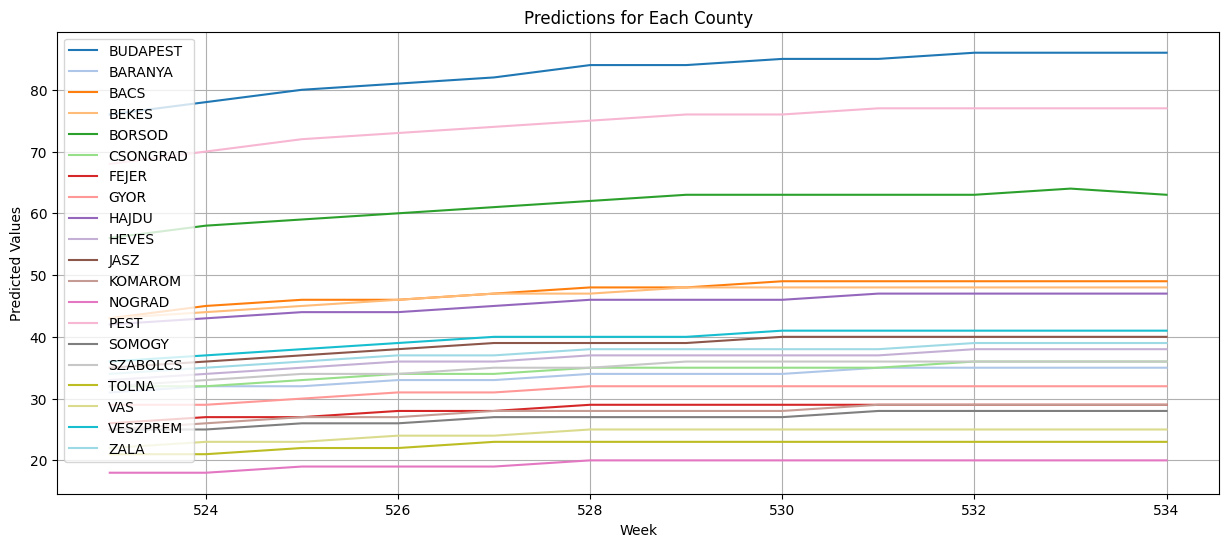

In [348]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Generate 20 different colors

# Set the figsize
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the predictions for each county with different colors
for i, col in enumerate(predictions_df_nn.columns[1:]):
    plt.plot(predictions_df_nn['Week'], predictions_df_nn[col], label=col, color=colors[i])

plt.xlabel('Week')
plt.ylabel('Predicted Values')
plt.title('Predictions for Each County')
plt.legend()
plt.grid(True)
plt.show()

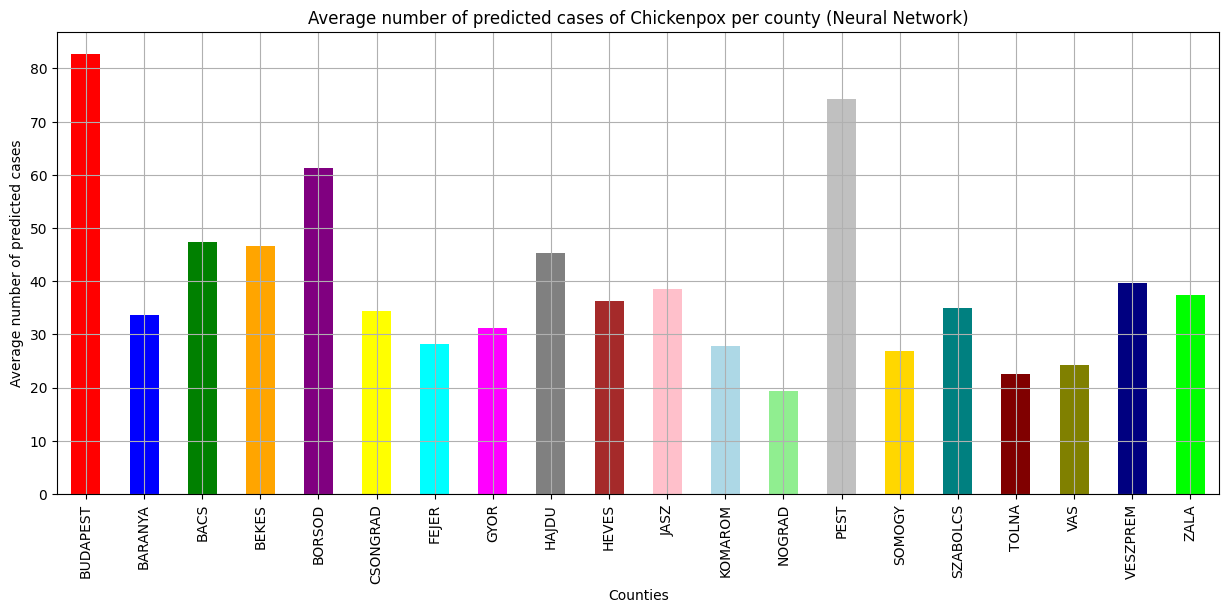

In [349]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown','pink', 'lightblue', 'lightgreen', 
          'silver', 'gold', 'teal', 'maroon', 'olive', 'navy', 'lime']
 
predictions_df_nn[column_list].mean().plot(kind='bar', color=colors, figsize=(15, 6), grid=True)

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.xlabel('Counties')
plt.ylabel('Average number of predicted cases')
plt.title('Average number of predicted cases of Chickenpox per county (Neural Network)')

# plt.tight_layout() 

plt.show()

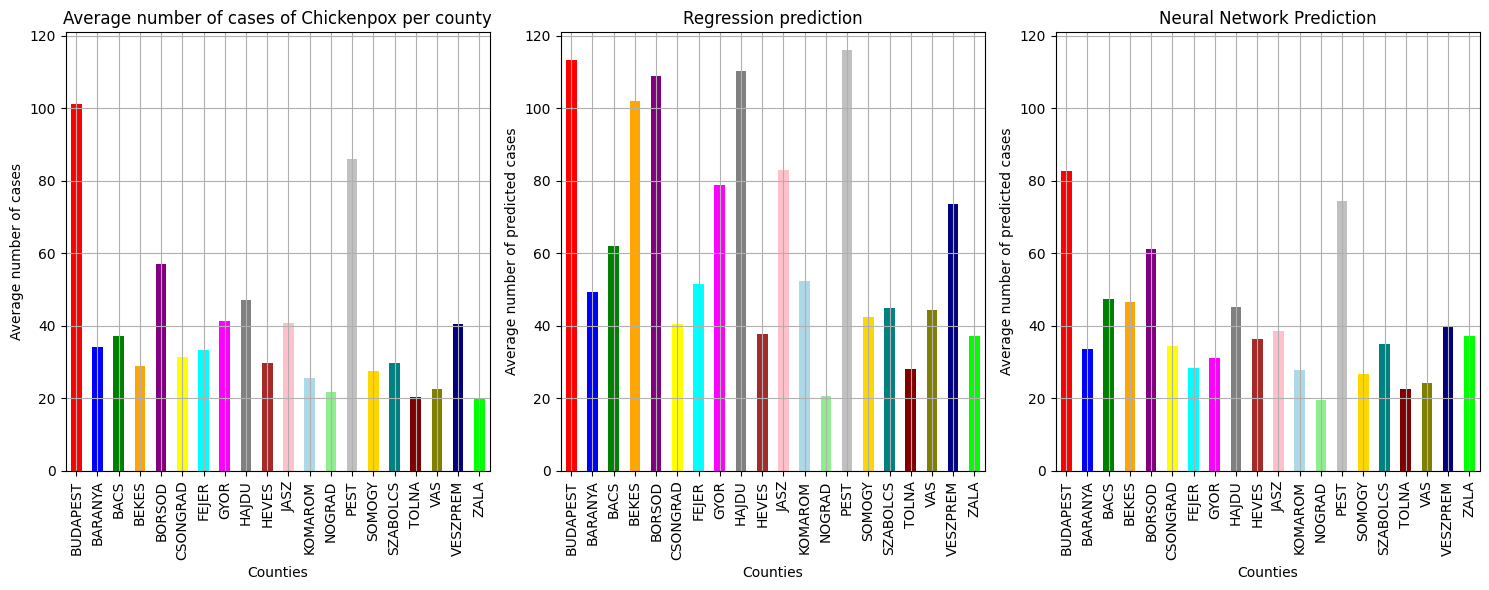

In [350]:
# Define the colors for the plots
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'lightblue', 'lightgreen', 'silver', 'gold', 'teal', 'maroon', 'olive', 'navy', 'lime']

# Create subplots with a 1x3 grid layout
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

avg_cases = df[column_list].mean()

avg_predicted_cases_regr = predictions_df_regr[column_list].mean()

avg_predicted_cases_nn = predictions_df_nn[column_list].mean()

if avg_cases.max() > avg_predicted_cases_regr.max():
    if avg_cases.max > avg_predicted_cases_nn.max():
        max_cases = avg_cases.max()
    else:
        max_cases = avg_predicted_cases_nn.max()

else:
    if avg_predicted_cases_regr.max() > avg_predicted_cases_nn.max():
        max_cases = avg_predicted_cases_regr.max()
    else:
        max_cases = avg_predicted_cases_nn.max()

# Plot the average number of cases
avg_cases.plot(kind='bar', color=colors, ax=axes[0], grid=True)
axes[0].set_xticklabels(avg_cases.index, rotation=90)
axes[0].set_xlabel('Counties')
axes[0].set_ylabel('Average number of cases')
axes[0].set_title('Average number of cases of Chickenpox per county')
axes[0].set_ylim([0, np.round(max_cases + 5)])  # Set y-axis limits

# Plot the average number of predicted cases (by regression model)
avg_predicted_cases_regr.plot(kind='bar', color=colors, ax=axes[1], grid=True)
axes[1].set_xticklabels(avg_predicted_cases_regr.index, rotation=90)
axes[1].set_xlabel('Counties')
axes[1].set_ylabel('Average number of predicted cases')
axes[1].set_title('Regression prediction')
axes[1].set_ylim([0, np.round(max_cases + 5)])  # Set y-axis limits

# Plot the average number of predicted cases (by neural network)
avg_predicted_cases_nn.plot(kind='bar', color=colors, ax=axes[2], grid=True)
axes[2].set_xticks(np.arange(len(avg_predicted_cases_nn.index)))  # Set the x-tick positions
axes[2].set_xticklabels(avg_predicted_cases_nn.index, rotation=90)  # Set the x-tick labels
axes[2].set_xlabel('Counties')
axes[2].set_ylabel('Average number of predicted cases')
axes[2].set_title('Neural Network Prediction')
axes[2].set_ylim([0, np.round(max_cases + 5)])  # Set y-axis limits

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()